# 📊 EDA Inicial de Comentarios sobre la Guerra en Ucrania (YouTube 2024)


Este notebook realiza un **análisis exploratorio** de los comentarios extraídos, con el objetivo de:

- Analiza la distribución de comentarios por canal y postura (`condiciones_cuenta`)
- Visualiza el volumen de comentarios a lo largo del tiempo
- Examina la longitud de los comentarios como posible indicador de bots o usuarios activos
- Prepara el dataset para análisis de texto, clustering y minería posterior
    

In [2]:
# Carga librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# Definición de colores para las categorías
colors = {
    'noticiero': 'grey',
    'pro-ruso':   'red',
    'pro-ucraniano': 'blue'
}

In [57]:
# Carga comentarios ya limpios
df = pd.read_csv("../notebooks/data_rebuild/comments_2024_final.csv")
print(f"Total de comentarios: {len(df)}")
df.head()

Total de comentarios: 372564


,comment_id,comment,comment_text_length,user_id,user_name,comment_time,comment_likes,total_reply_count,is_top_level_comment,video_title,...,video_published_at,video_views,video_likes,video_duration,video_tags,video_category_id,condiciones_cuenta,account_created_at,channel_id,subscriber_count
0,Ugx4bKlVZi9Liq_kn694AaABAg,Maravilha,9,UCGpTAa6SwySUz43S1SmB5HA,@ozanaferreira6320,2024-02-28T01:15:40Z,0,0,True,GUERRA UCRANIA | Ataque ruso en Járkov desata ...,...,2024-02-11T19:50:45Z,7543,91,118.0,Conflictos|Conflictos armados|Europa|Europa es...,25,noticiero,2023-01-22T18:49:49.470794Z,UCnsvJeZO4RigQ898WdDNoBw,3150000
1,UgzXN_szrYRkLkE_Iu54AaABAg,"fuerza ucrania , resista , ya Estados Unidos a...",142,UCuJ5zwYOHnP3xWKVStdiFKA,@alegreestrella,2024-02-14T02:57:02Z,0,0,True,GUERRA UCRANIA | Ataque ruso en Járkov desata ...,...,2024-02-11T19:50:45Z,7543,91,118.0,Conflictos|Conflictos armados|Europa|Europa es...,25,noticiero,2007-06-14T16:44:39Z,UCnsvJeZO4RigQ898WdDNoBw,3150000
2,Ugyk9e56M1UPytBgJxt4AaABAg,Con Rusia no se juega,21,UCs6XcOURZYta1A5E2UUazPg,@romeljimenez525,2024-02-12T11:01:54Z,0,0,True,GUERRA UCRANIA | Ataque ruso en Járkov desata ...,...,2024-02-11T19:50:45Z,7543,91,118.0,Conflictos|Conflictos armados|Europa|Europa es...,25,noticiero,2017-10-29T21:43:38Z,UCnsvJeZO4RigQ898WdDNoBw,3150000
3,UgxixkbTI_7WT96zx5Z4AaABAg,HASTA CUANDO LOS RUSSOS QUERAN LA GUERRA AP...,108,UC1YcIdfwWBd8uduwz3RKOYQ,@internetlucho,2024-02-12T04:29:34Z,0,0,True,GUERRA UCRANIA | Ataque ruso en Járkov desata ...,...,2024-02-11T19:50:45Z,7543,91,118.0,Conflictos|Conflictos armados|Europa|Europa es...,25,noticiero,2009-05-14T18:39:26Z,UCnsvJeZO4RigQ898WdDNoBw,3150000
4,UgxaBahZ_oC9yw3QlFl4AaABAg,purin basura,12,UCY6wGiSVUAI1-vRXv-dGhyQ,@salvadorg8968,2024-02-12T02:31:16Z,0,0,True,GUERRA UCRANIA | Ataque ruso en Járkov desata ...,...,2024-02-11T19:50:45Z,7543,91,118.0,Conflictos|Conflictos armados|Europa|Europa es...,25,noticiero,2019-03-25T23:53:31Z,UCnsvJeZO4RigQ898WdDNoBw,3150000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372564 entries, 0 to 372563
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   comment_id            372564 non-null  object 
 1   comment               372422 non-null  object 
 2   comment_text_length   372564 non-null  int64  
 3   user_id               372564 non-null  object 
 4   user_name             372133 non-null  object 
 5   comment_time          372564 non-null  object 
 6   comment_likes         372564 non-null  int64  
 7   total_reply_count     372564 non-null  int64  
 8   is_top_level_comment  372564 non-null  bool   
 9   video_title           372564 non-null  object 
 10  channel_title         372564 non-null  object 
 11  video_published_at    372564 non-null  object 
 12  video_views           372564 non-null  int64  
 13  video_likes           372564 non-null  int64  
 14  video_duration        372564 non-null  float64
 15  

In [59]:
# Eliminar registros donde falta el texto del comentario o el nombre del usuario
df = df.dropna(subset=["user_name"]).copy()
df = df.dropna(subset=["comment"]).copy()

# Opcional: mostrar la nueva cantidad de registros
print(f"Dataset limpio: {df.shape[0]} registros restantes")


Dataset limpio: 372000 registros restantes


In [60]:
df_deduplicated = df.drop_duplicates(subset=["comment_id"])
print(f"Comentarios únicos: {len(df_deduplicated)}")

Comentarios únicos: 371824


In [61]:
df_deduplicated.describe().T

,count,mean,std,min,25%,50%,75%,max
comment_text_length,371824.0,1.375210e+02,2.168329e+02,1.0,41.0,83.0,158.0,9700.0
comment_likes,371824.0,3.753978e+00,5.227415e+01,0.0,0.0,0.0,1.0,19179.0
total_reply_count,371824.0,4.424486e-01,3.362316e+00,0.0,0.0,0.0,0.0,393.0
video_views,371824.0,3.182325e+05,4.284533e+05,654.0,77319.0,144572.0,333495.0,2857237.0
video_likes,371824.0,1.595344e+04,1.407489e+04,0.0,7893.0,12086.0,18072.0,92112.0
video_duration,371824.0,9.169356e+02,1.366274e+03,8.0,339.0,856.0,1071.0,42901.0
video_category_id,371824.0,2.524107e+01,6.562255e-01,24.0,25.0,25.0,25.0,27.0
subscriber_count,371824.0,1.598947e+06,1.375104e+06,476000.0,476000.0,476000.0,2710000.0,3680000.0


In [62]:
# Conversión de fechas y orden temporal
df_deduplicated = df_deduplicated.assign(
    comment_time=pd.to_datetime(df_deduplicated["comment_time"], errors="coerce", utc=True),
    video_published_at=pd.to_datetime(df_deduplicated["video_published_at"], errors="coerce", utc=True)
)


In [63]:
df_deduplicated = df_deduplicated.assign(
    account_created_at=pd.to_datetime(
        df_deduplicated["account_created_at"],
        format="%Y-%m-%dT%H:%M:%S.%fZ",
        errors="coerce",
        utc=True
    )
)


In [64]:
# Asegúrate de que ambas columnas son datetime (si no lo hiciste antes)
df_deduplicated = df_deduplicated.assign(
    comment_time=pd.to_datetime(df_deduplicated["comment_time"], errors="coerce", utc=True),
    account_created_at=pd.to_datetime(df_deduplicated["account_created_at"], errors="coerce", utc=True)
)

# Calcula días desde creación y filtra negativos sin warnings
df_deduplicated = (
    df_deduplicated
    .assign(days_since_account_creation=(df_deduplicated["comment_time"] - df_deduplicated["account_created_at"]).dt.days)
    .loc[
        lambda d: d["days_since_account_creation"].isna() | (d["days_since_account_creation"] >= 0)
    ]
    .copy()
)

print(df_deduplicated["days_since_account_creation"].describe())


count    163746.00000
mean        782.92674
std         528.88033
min           0.00000
25%         302.00000
50%         727.00000
75%        1261.00000
max        2097.00000
Name: days_since_account_creation, dtype: float64


In [65]:
df_deduplicated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371809 entries, 0 to 372563
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype              
---  ------                       --------------   -----              
 0   comment_id                   371809 non-null  object             
 1   comment                      371809 non-null  object             
 2   comment_text_length          371809 non-null  int64              
 3   user_id                      371809 non-null  object             
 4   user_name                    371809 non-null  object             
 5   comment_time                 371809 non-null  datetime64[ns, UTC]
 6   comment_likes                371809 non-null  int64              
 7   total_reply_count            371809 non-null  int64              
 8   is_top_level_comment         371809 non-null  bool               
 9   video_title                  371809 non-null  object             
 10  channel_title                371809 n

## 📊 Distribución por canal y postura ideológica

<Figure size 1200x800 with 0 Axes>

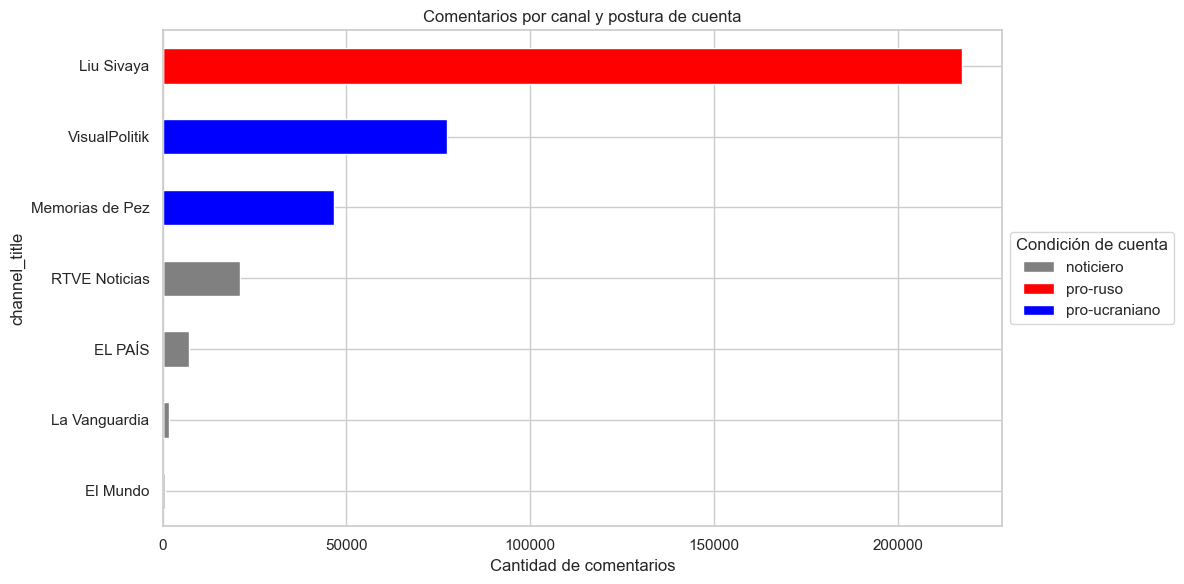

In [66]:
# 1) Agrupar y contar comentarios por canal y condición de cuenta
channel_counts = (
    df_deduplicated
    .groupby(['channel_title', 'condiciones_cuenta'])
    .size()
    .unstack(fill_value=0)
)

# 2) Ordenar canales por total de comentarios
channel_counts['total'] = channel_counts.sum(axis=1)
channel_counts = channel_counts.sort_values('total', ascending=True).drop(columns='total')

# 3) Graficar barras horizontales apiladas
plt.figure(figsize=(12, 8))
channel_counts.plot(
    kind='barh',
    stacked=True,
    color=[colors[c] for c in channel_counts.columns]
)
plt.xlabel("Cantidad de comentarios")
plt.title("Comentarios por canal y postura de cuenta")
plt.legend(title="Condición de cuenta", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

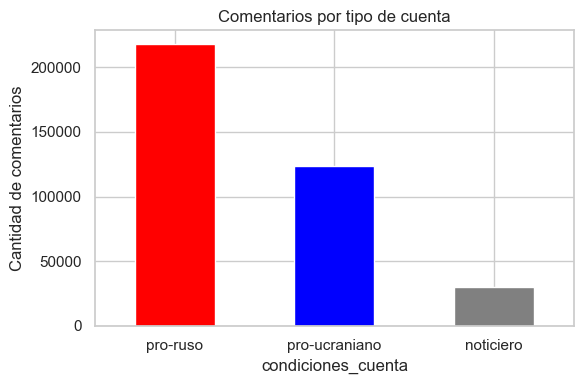

In [67]:
# Gráfico de barras x tipo de cuenta
counts = df_deduplicated['condiciones_cuenta'].value_counts()
plt.figure(figsize=(6,4))
counts.plot(
    kind='bar',
    color=[colors[c] for c in counts.index],
    title='Comentarios por tipo de cuenta'
)
plt.ylabel("Cantidad de comentarios")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 🕓 Timeline de comentarios

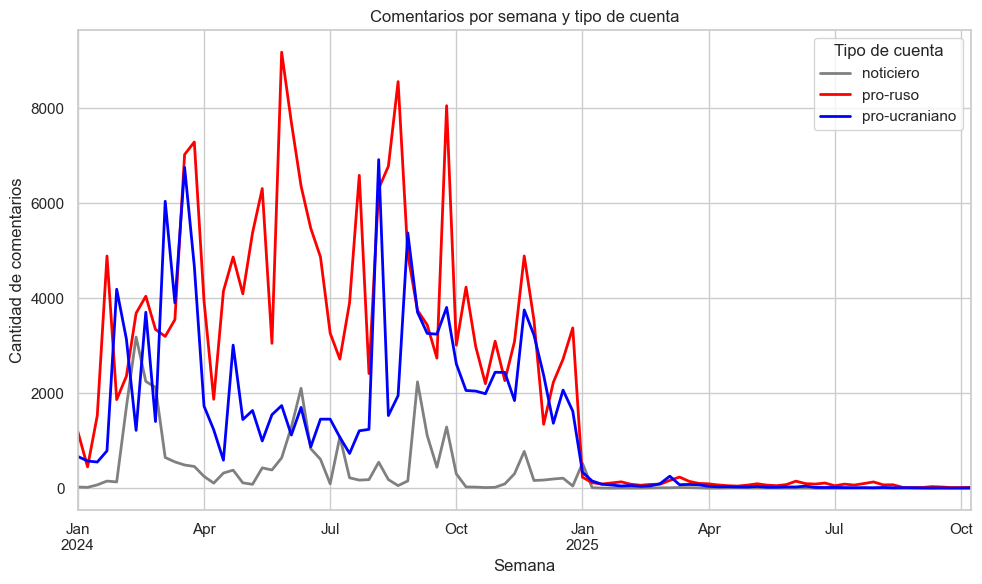

In [68]:
# Agrupar por semana y por tipo de cuenta
timeline = (
    df_deduplicated
    .groupby([pd.Grouper(key='comment_time', freq='W'), 'condiciones_cuenta'])
    .size()
    .unstack(fill_value=0)
)

# Graficar líneas por categoría
plt.figure(figsize=(10, 6))
timeline.plot(
    ax=plt.gca(),
    color=[colors[c] for c in timeline.columns],
    linewidth=2
)
plt.title("Comentarios por semana y tipo de cuenta")
plt.ylabel("Cantidad de comentarios")
plt.xlabel("Semana")
plt.legend(title="Tipo de cuenta")
plt.tight_layout()
plt.show()


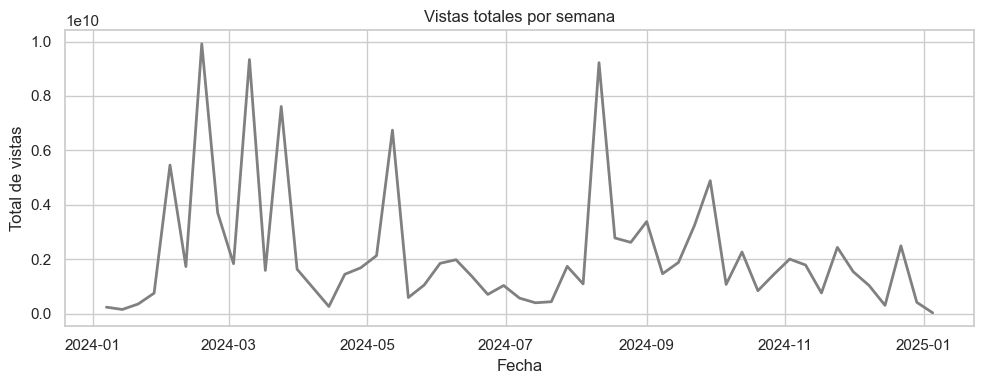

In [69]:
# Timeline de vistas por semana (línea única, color neutro)
vistas_por_semana = df_deduplicated.set_index("video_published_at").resample("W")["video_views"].sum()

plt.figure(figsize=(10, 4))
plt.plot(vistas_por_semana.index, vistas_por_semana.values, color=colors['noticiero'], linewidth=2)
plt.title("Vistas totales por semana")
plt.ylabel("Total de vistas")
plt.xlabel("Fecha")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_2604\3256630277.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


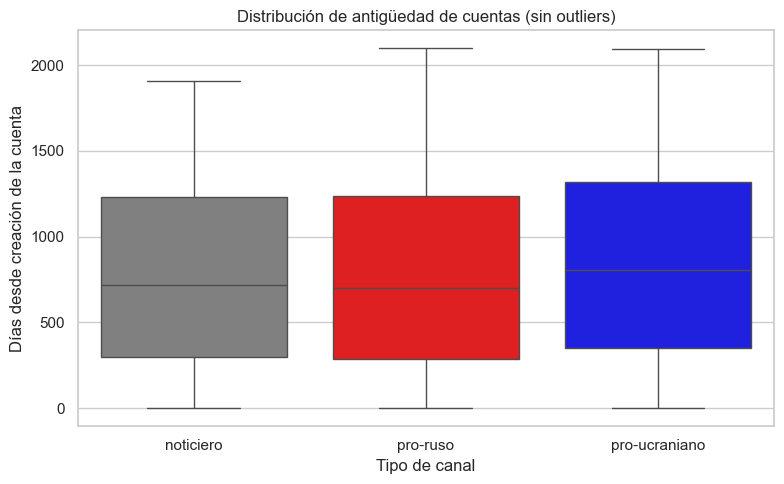

In [72]:
# --- preparar datos SOLO para el gráfico ---
df_plot = (
    df.assign(
        comment_time=pd.to_datetime(df["comment_time"], errors="coerce", utc=True),
        account_created_at=pd.to_datetime(df["account_created_at"], errors="coerce", utc=True)
    )
    .assign(
        days_since_account_creation=lambda d: (d["comment_time"] - d["account_created_at"]).dt.days
    )
    # opcional: descarta cuentas "del futuro" (diferencia negativa)
    .loc[lambda d: d["days_since_account_creation"].isna() | (d["days_since_account_creation"] >= 0)]
    .copy()
)

# --- boxplot (sin outliers) ---
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="condiciones_cuenta",
    y="days_since_account_creation",
    data=df_plot,
    palette=colors,      # tu diccionario de colores existente
    showfliers=False
)
plt.xlabel("Tipo de canal")
plt.ylabel("Días desde creación de la cuenta")
plt.title("Distribución de antigüedad de cuentas (sin outliers)")
plt.tight_layout()
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_2604\541273814.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .dt.to_period('M') \


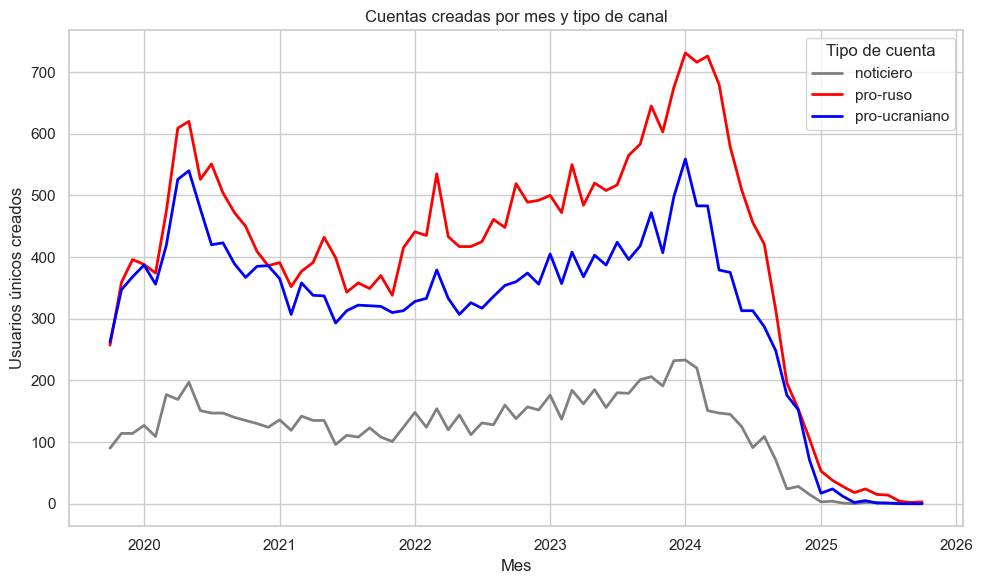

In [71]:
# 1) Deduplicar usuarios por condición y quedarnos con su account_created_at
unique_users = (
    df_deduplicated[['user_id','condiciones_cuenta','account_created_at']]
      .dropna(subset=['account_created_at'])
      .drop_duplicates(subset=['user_id','condiciones_cuenta'])
)

# 2) Convertir a periodo mensual (puedes usar 'D' si prefieres diario)
unique_users['month'] = unique_users['account_created_at'] \
    .dt.to_period('M') \
    .dt.to_timestamp()

# 3) Contar nuevos usuarios únicos por mes y condición
counts = (
    unique_users
    .groupby(['month','condiciones_cuenta'])
    .size()
    .unstack(fill_value=0)
)

# 4) Graficar líneas
plt.figure(figsize=(10,6))
for cat, col in colors.items():
    if cat in counts.columns:
        plt.plot(counts.index, counts[cat], label=cat, color=col, linewidth=2)

plt.title("Cuentas creadas por mes y tipo de canal")
plt.xlabel("Mes")
plt.ylabel("Usuarios únicos creados")
plt.legend(title="Tipo de cuenta")
plt.tight_layout()
plt.show()

## 🧠 Comentarios por video y engagement

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


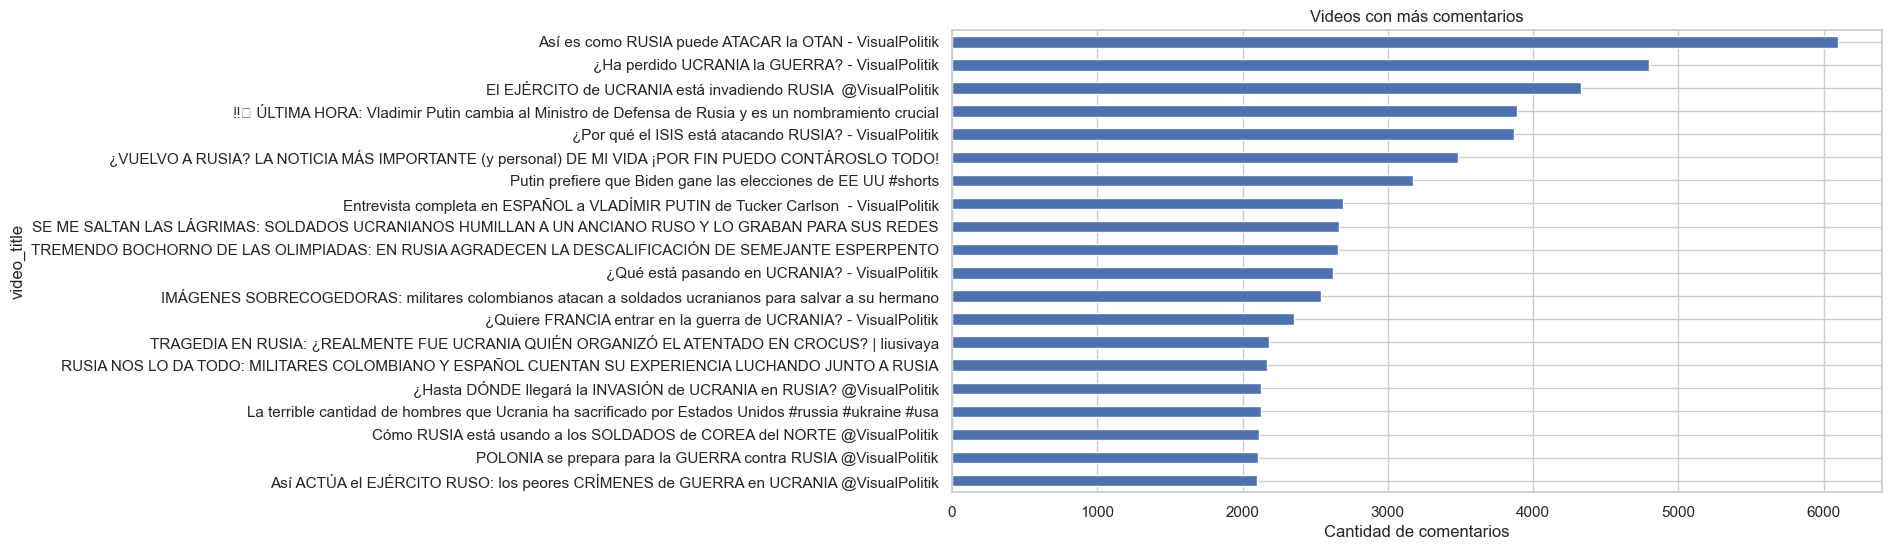

In [73]:
comentarios_por_video = df_deduplicated.groupby('video_title')['comment_id'].count().sort_values(ascending=False).head(20)
comentarios_por_video.plot(kind='barh', title="Videos con más comentarios")
plt.xlabel("Cantidad de comentarios")
plt.gca().invert_yaxis()
plt.show()

In [74]:
comentarios_por_video

video_title
Así es como RUSIA puede ATACAR la OTAN - VisualPolitik                                                  6098
¿Ha perdido UCRANIA la GUERRA? - VisualPolitik                                                          4801
El EJÉRCITO de UCRANIA está invadiendo RUSIA  @VisualPolitik                                            4331
‼️ ÚLTIMA HORA: Vladimir Putin cambia al Ministro de Defensa de Rusia y es un nombramiento crucial      3892
¿Por qué el ISIS está atacando RUSIA? - VisualPolitik                                                   3872
¿VUELVO A RUSIA? LA NOTICIA MÁS IMPORTANTE (y personal) DE MI VIDA ¡POR FIN PUEDO CONTÁROSLO TODO!      3482
Putin prefiere que Biden gane las elecciones de EE UU #shorts                                           3172
Entrevista completa en ESPAÑOL a VLADÍMIR PUTIN de Tucker Carlson  - VisualPolitik                      2695
SE ME SALTAN LAS LÁGRIMAS: SOLDADOS UCRANIANOS HUMILLAN A UN ANCIANO RUSO Y LO GRABAN PARA SUS REDES    2661
TREMEND

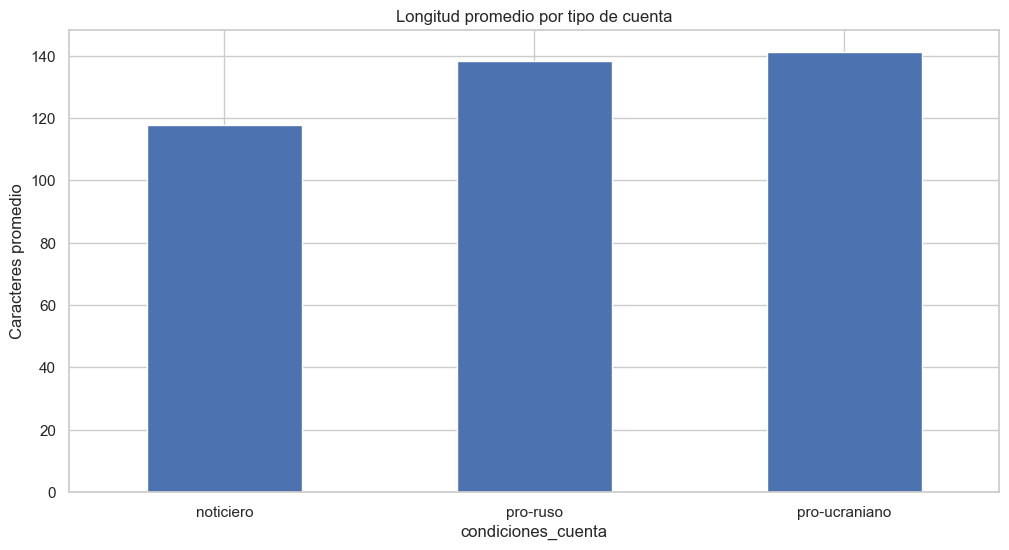

In [75]:
df_deduplicated.groupby("condiciones_cuenta")["comment_text_length"].mean().plot(kind='bar')
plt.title("Longitud promedio por tipo de cuenta")
plt.ylabel("Caracteres promedio")
plt.xticks(rotation=0)
plt.show()

In [76]:
top_canales_videos = (
    df_deduplicated.drop_duplicates(subset=["video_title", "channel_title", "video_published_at"])
    .groupby("channel_title")
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="cantidad_videos")
)


top_canales_vistas = (
    df_deduplicated.drop_duplicates(subset=["video_title", "channel_title", "video_published_at"])
    .groupby("channel_title")["video_views"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="vistas_totales")
)

# Top comentarios con más respuestas
top_comentarios_respuestas = (
    df_deduplicated.sort_values("total_reply_count", ascending=False)
    [["user_name", "comment", "total_reply_count", "video_title", "channel_title"]]
    .head(10)
)

# Top comentarios con más likes
top_comentarios_likes = (
    df_deduplicated.sort_values("comment_likes", ascending=False)
    [["user_name", "comment", "comment_likes", "video_title", "channel_title"]]
    .head(10)
)

# Top usuarios por cantidad de comentarios
top_usuarios_comentarios = (
    df_deduplicated.groupby("user_name")
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="cantidad_comentarios")
)

# Videos más comentados (por conteo en dataset)
top_videos_comentados = (
    df_deduplicated.groupby(["video_title", "channel_title"])
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="cantidad_comentarios")
)


In [77]:
top_canales_videos

,channel_title,cantidad_videos
0,Liu Sivaya,431
1,RTVE Noticias,154
2,EL PAÍS,125
3,Memorias de Pez,94
4,La Vanguardia,67
5,VisualPolitik,53
6,El Mundo,50


In [78]:
top_canales_vistas

,channel_title,vistas_totales
0,Liu Sivaya,37196790
1,VisualPolitik,30418310
2,Memorias de Pez,22219984
3,EL PAÍS,5908092
4,RTVE Noticias,5853806
5,La Vanguardia,3303670
6,El Mundo,501639


In [79]:
top_comentarios_respuestas

,user_name,comment,total_reply_count,video_title,channel_title
356097,@joel0256,Estado islámico: Fuimos nosotros\nPutin: Ucran...,393,¿Por qué el ISIS está atacando RUSIA? - Visual...,VisualPolitik
91822,@salvadorg8968,y hay gente que justifica estos bombardeos a c...,300,GUERRA UCRANIA | Periodistas captan en directo...,EL PAÍS
241126,@gonzalonkumu1992,Hipocresía es lo que le caracteriza a los polí...,217,ÚLTIMA HORA | ATENTADO EN MOSCÚ: TRAGEDIA PARA...,Liu Sivaya
130573,@CarlosBauman,Yo recuerdo que Visualpolitik informaba hace 1...,216,¿Qué está pasando en UCRANIA? - VisualPolitik,VisualPolitik
233207,@b3t0azaber73,Putin: Biden\nEntrevistador: porque? \nPutin: ...,212,Putin prefiere que Biden gane las elecciones d...,EL PAÍS
98831,@antz_,Me da risa como van cambiando la retórica aquí...,204,¿Ha perdido UCRANIA la GUERRA? - VisualPolitik,VisualPolitik
204931,@JCSport28,"Imposible concentrarse... ""El frente Ruso se m...",193,‼️ ÚLTIMA HORA: Vladimir Putin cambia al Minis...,Liu Sivaya
355890,@vulcano911,Hay que ser un ldlota sabiendo que hay una gue...,186,¿Por qué el ISIS está atacando RUSIA? - Visual...,VisualPolitik
76373,@VisualPolitik,Esperamos que os haya gustado este vídeo. Cree...,185,Así es como RUSIA puede ATACAR la OTAN - Visua...,VisualPolitik
329475,@alansmihtmenesesalmeida7053,"Zelenski no fue un gran presidente, pero supo ...",182,ENRIQUE OPINA DE ZELENSKI,VisualPolitik


In [80]:
top_comentarios_likes

,user_name,comment,comment_likes,video_title,channel_title
233207,@b3t0azaber73,Putin: Biden\nEntrevistador: porque? \nPutin: ...,19179,Putin prefiere que Biden gane las elecciones d...,EL PAÍS
233962,@divconte5645,Putin : Biden …\nBiden : quien es biden ?,12253,Putin prefiere que Biden gane las elecciones d...,EL PAÍS
233763,@Eduardo-z2y3z,Que elegante forma de decirle a Biden que es u...,8659,Putin prefiere que Biden gane las elecciones d...,EL PAÍS
234216,@saulcastro6730,Putin es sarcástico!😂\nSabe que Biden está hun...,8558,Putin prefiere que Biden gane las elecciones d...,EL PAÍS
177837,@gavz794,Rusia: demonios fallé...\nOTAN: demonios falló...,3910,Al borde de la Tercera Guerra Mundial #guerrar...,Memorias de Pez
234079,@paulvargas3288,El arte de la guerra: No molestes a tu enemigo...,3909,Putin prefiere que Biden gane las elecciones d...,EL PAÍS
233204,@capsulas1,"Si a mi me preguntan contra quien enfrentarme,...",3410,Putin prefiere que Biden gane las elecciones d...,EL PAÍS
234243,@lusom5933,Yo creo que lo dice para que voten a trump sin...,2976,Putin prefiere que Biden gane las elecciones d...,EL PAÍS
259662,@CASINEROCHILENO,"No es una invasión, es una operación especial ...",2845,El EJÉRCITO de UCRANIA está invadiendo RUSIA ...,VisualPolitik
232755,@Ele-Dopa,"Si Putin prefiere a Biden, deben votar a Trump.",2730,Putin prefiere que Biden gane las elecciones d...,EL PAÍS


In [81]:
top_usuarios_comentarios

,user_name,cantidad_comentarios
0,@HumbertoRodriguez-yp5xh,629
1,@nehemiaaszegarra6976,580
2,@tupacchak,543
3,@hectorfabianelorza9522,484
4,@cachanillajosue711,462
5,@VenustianoColin,451
6,@teresitairenecorreapereyra223,395
7,@renedecima6644,391
8,@EduardoSanchez-q7v,371
9,@benetfernandezvalles847,329


In [82]:
# Asegurarse de que user_name no tenga nulos
df_deduplicated["user_name"] = df_deduplicated["user_name"].fillna("Usuario desconocido")

# Agrupación extendida
top_usuarios_comentarios = (
    df_deduplicated.groupby("user_name")
    .agg(
        cantidad_comentarios=("comment_id", "count"),
        cantidad_videos=("video_title", "nunique"),
        cantidad_canales=("channel_title", "nunique")
    )
    .sort_values("cantidad_comentarios", ascending=False)
    .head(10)
    .reset_index()
)

display(top_usuarios_comentarios)


,user_name,cantidad_comentarios,cantidad_videos,cantidad_canales
0,@HumbertoRodriguez-yp5xh,629,161,1
1,@nehemiaaszegarra6976,580,317,1
2,@tupacchak,543,146,1
3,@hectorfabianelorza9522,484,137,3
4,@cachanillajosue711,462,207,4
5,@VenustianoColin,451,200,2
6,@teresitairenecorreapereyra223,395,180,1
7,@renedecima6644,391,391,2
8,@EduardoSanchez-q7v,371,229,5
9,@benetfernandezvalles847,329,156,1


In [83]:
top_videos_comentados

,video_title,channel_title,cantidad_comentarios
0,Así es como RUSIA puede ATACAR la OTAN - Visua...,VisualPolitik,6098
1,¿Ha perdido UCRANIA la GUERRA? - VisualPolitik,VisualPolitik,4801
2,El EJÉRCITO de UCRANIA está invadiendo RUSIA ...,VisualPolitik,4331
3,‼️ ÚLTIMA HORA: Vladimir Putin cambia al Minis...,Liu Sivaya,3892
4,¿Por qué el ISIS está atacando RUSIA? - Visual...,VisualPolitik,3872
5,¿VUELVO A RUSIA? LA NOTICIA MÁS IMPORTANTE (y ...,Liu Sivaya,3482
6,Putin prefiere que Biden gane las elecciones d...,EL PAÍS,3172
7,Entrevista completa en ESPAÑOL a VLADÍMIR PUTI...,VisualPolitik,2695
8,SE ME SALTAN LAS LÁGRIMAS: SOLDADOS UCRANIANOS...,Liu Sivaya,2661
9,TREMENDO BOCHORNO DE LAS OLIMPIADAS: EN RUSIA ...,Liu Sivaya,2660


In [84]:
# 💾 Guardar dataset limpio en la carpeta del proyecto
output_path = "../data/processed/2_comments_youtube_refined.csv"
df_deduplicated.to_csv(output_path, index=False)